<a href="https://colab.research.google.com/github/shravanc/gcp_project/blob/master/BigData_And_Visualization_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#Copyting to local directory and Unzipping

In [0]:
!cp /content/gdrive/My\ Drive/final.zip .
!unzip final.zip >> /dev/null

# Loading Libraries

In [0]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = '/content/csv_files_new'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Merging all 1325 csvs into one dataframe

In [0]:
def load_all_csv_to_data_frame(path):
   # use your path
  all_files = glob.glob(path + "/*.csv")
  li = []

  for i, filename in enumerate(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

  df = pd.concat(li, axis=0, ignore_index=True)
  df.rename(columns={"others": "year"}, inplace = True)     # Renaming from others to year
  df.rename(columns={"Course": "course"}, inplace = True)   # Renaming from Course to course
  df.rename(columns={"Day": "day"}, inplace = True)         # Renaming from Day to day
  df['class_duration'] = df['end_time'] - df['start_time']  # creating new column with class_duration
  return df

In [0]:
main_df = load_all_csv_to_data_frame(path)

In [0]:
main_df.head()

,start_time,end_time,module,class_type,staff,room_number,duration,start_week,week,day,course,year,class_duration
0,9,11,GA4142,LEC,DE BRUN SORCHA MS FINNEGAN AENGUS DR,FB028,"1-10,12-13",1,1,Monday,LM340,1,2
1,9,11,GA4142,LEC,DE BRUN SORCHA MS FINNEGAN AENGUS DR,FB028,"1-10,12-13",1,2,Monday,LM340,1,2
2,9,11,GA4142,LEC,DE BRUN SORCHA MS FINNEGAN AENGUS DR,FB028,"1-10,12-13",1,3,Monday,LM340,1,2
3,9,11,GA4142,LEC,DE BRUN SORCHA MS FINNEGAN AENGUS DR,FB028,"1-10,12-13",1,4,Monday,LM340,1,2
4,9,11,GA4142,LEC,DE BRUN SORCHA MS FINNEGAN AENGUS DR,FB028,"1-10,12-13",1,5,Monday,LM340,1,2


from the above we can see that data for first year and module GA4142 is distributed across the week 1, 2, 3, 4, 5 and so on can be observed for respective year and respective course. Here week columns is expanded version of duration 1-10,12-13 (i.e it gets expanded to 1, 2, 3, ,4, 5, 6, 7, 8, 9, 10, 12, 13)

In [0]:
main_df.tail()

,start_time,end_time,module,class_type,staff,room_number,duration,start_week,week,day,course,year,class_duration
40527156,17,18,CS4174,LEC,WARD NICHOLAS DR,S117,"1-10,12-13",1,8,Tuesday,LM113,2,1
40527157,17,18,CS4174,LEC,WARD NICHOLAS DR,S117,"1-10,12-13",1,9,Tuesday,LM113,2,1
40527158,17,18,CS4174,LEC,WARD NICHOLAS DR,S117,"1-10,12-13",1,10,Tuesday,LM113,2,1
40527159,17,18,CS4174,LEC,WARD NICHOLAS DR,S117,"1-10,12-13",1,12,Tuesday,LM113,2,1
40527160,17,18,CS4174,LEC,WARD NICHOLAS DR,S117,"1-10,12-13",1,13,Tuesday,LM113,2,1


In [0]:
main_df.describe()

,start_time,end_time,module,class_type,staff,room_number,duration,start_week,week,day,course,year,class_duration
count,40527161,40527161,40527161,40527161,39989534,39331302,40527161,40527161,40527161,40527161,40527161,40527161,40527161
unique,12,13,843,3,746,241,170,63,12,6,278,4,6
top,9,18,EC4102,TUT,TA4MMA,KB119,"1-10,12-13",1,10,Tuesday,LM975,3,1
freq,5709510,5641614,1505208,20162695,1035238,897328,21913944,23100426,3660607,9195518,307562,16653360,28353945


From the above we can get there are in total 746 staff across all courses. Maximum class duration is 6 hours. In total there are 843 modules spread across 300 Courses.

# Seperating out only week 2 data

In [0]:
week_2_df = main_df[main_df['week'] == 2].reindex()

In [0]:
week_2_df.head()

,start_time,end_time,module,class_type,staff,room_number,duration,start_week,week,day,course,year,class_duration
1,9,11,GA4142,LEC,DE BRUN SORCHA MS FINNEGAN AENGUS DR,FB028,"1-10,12-13",1,2,Monday,LM340,1,2
13,9,10,JA4212,TUT,FRIZELLE KAORI MISS,KB118,"1-10,12-13",1,2,Tuesday,LM340,1,1
25,9,10,GA4134,LEC,DE BRUN SORCHA MS,KBG14,"1-10,12-13",1,2,Wednesday,LM340,1,1
47,9,10,PO4052,LEC,ROBINSON NEIL PROFESSOR,FG061,2-4,2,2,Thursday,LM340,1,1
52,9,10,GA4142,TUT,ANO2GA,LCB009,"1-10,12-13",1,2,Friday,LM340,1,1


# Separating Tuesday data

In [0]:
tuesday_df = week_2_df[week_2_df['day']=='Tuesday']

In [0]:
tuesday_df.head()

,start_time,end_time,module,class_type,staff,room_number,duration,start_week,week,day,course,year,class_duration
13,9,10,JA4212,TUT,FRIZELLE KAORI MISS,KB118,"1-10,12-13",1,2,Tuesday,LM340,1,1
76,10,12,LI4212,LEC,MORIARTY MÁIRÉAD DR,KBG12,"1-10,12-13",1,2,Tuesday,LM340,1,2
191,12,13,GA4142,TUT,ANO2GA,LCB009A,"1-10,12-13",1,2,Tuesday,LM340,1,1
227,13,14,FR4242,TUT,LE BARON FLORENCE MS,B1005,"1-10,12-13",1,2,Tuesday,LM340,1,1
239,13,14,JA4212,TUT,FRIZELLE KAORI MISS,LCB010,"1-10,12-13",1,2,Tuesday,LM340,1,1


# Using only week2 dataset and tuesday data for further analysis

In [0]:
df = tuesday_df

## start_time ditribution over course and and year

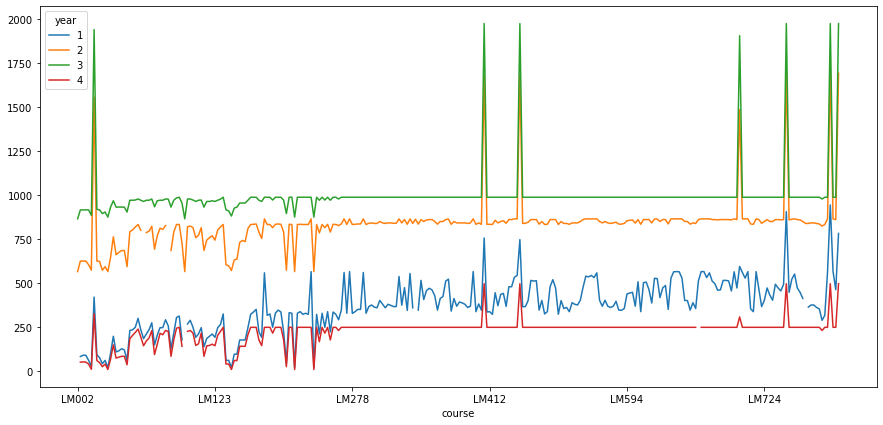

In [0]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['course','year']).count()['start_time'].unstack().plot(ax=ax)

## From the above we can get that there are less course ditributed over two years. In other words, there are more course in the period of 1 or 2 years. Third year onwards there are less courses

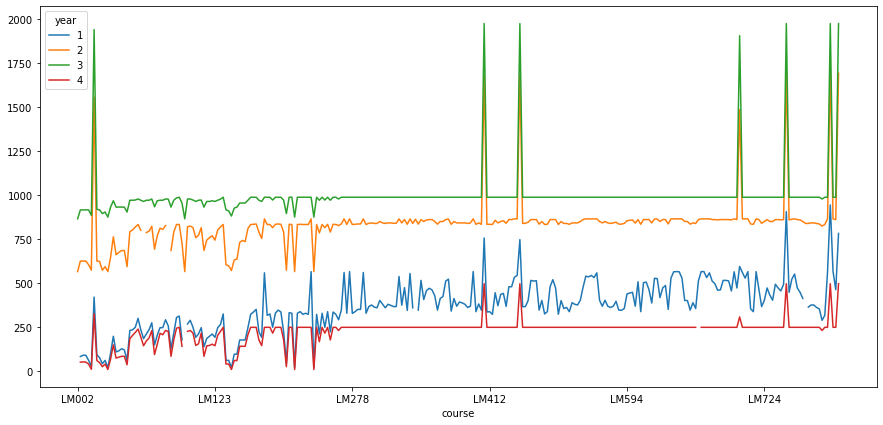

In [0]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['course','year']).count()['class_duration'].unstack().plot(ax=ax)

# TASK 1.
Find out the daily course distribution for the second week (week 2). To be more specific, you
should count how many groups of students are having classes on Monday, Tuesday, and so
on.


In [0]:
def NumClasses(name):
    ''' Function to return number of classes per day in a week for a course in week 2'''
    CourseA = week_2_df[week_2_df['course'] == name]
    
    week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
    modulesPerDay = []
    for day in week:
        
        # find modules running in one day
        CourseDay = CourseA[CourseA['day'].str.contains(day)]
        
        # append to array
        modulesPerDay.append(CourseDay['module'].unique().size)
    return modulesPerDay


In [0]:
CourseArray = df['course'].unique()
#print(CourseArray)
# create dict with course and classes distribution of each course
CourseClasses = {}
for i in range(len(CourseArray)):
    CourseClasses[CourseArray[i]] = NumClasses(CourseArray[i])
    

In [89]:
task_1_df = pd.DataFrame(CourseClasses)
task_1_df.head()

,LM340,LM125,LM103,LM605,LM379,LM725,LM665,LM228,LM124,LM325,LM088,LM278,LM374,LM002,LM669,LM434,LM056,LM186,LM975,LM718,LM426,LM064,LM726,LM490,LM591,LM472,LM316,LM679,LM120,LM639,LM446,LM479,LM638,LM051,LM066,LM152,LM058,LM285,LM277,LM516,...,LM262,LM113,LM338,LM902,LM803,LM685,LM388,LM909,LM431,LM805,LM099,LM637,LM100,LM491,LM297,LM804,LM597,LM269,LM200,LM502,LM201,LM617,LM808,LM094,LM651,LM196,LM082,LM581,LM335,LM709,LM674,LM533,LM728,LM699,LM131,LM956,LM689,LM440,LM449,LM373
0,341,331,325,341,341,341,276,341,321,341,321,341,341,238,341,341,262,317,341,341,341,320,341,341,341,341,341,341,306,341,341,341,341,313,317,303,317,341,341,341,...,341,314,341,341,341,341,341,341,341,341,238,341,331,341,341,341,341,332,341,341,341,341,341,337,341,325,314,341,341,341,341,341,341,341,264,341,341,341,341,341
1,341,330,324,341,341,341,274,341,320,341,320,341,341,244,341,341,270,316,341,341,341,320,341,341,341,341,341,341,304,341,341,341,341,309,316,301,316,341,341,341,...,341,313,341,341,341,341,341,341,341,341,244,341,331,341,341,341,341,332,341,341,341,341,341,340,341,324,310,341,341,341,341,341,341,341,270,341,341,341,341,341
2,269,259,256,269,269,269,218,269,252,269,253,269,269,187,269,269,213,249,269,269,269,251,269,269,269,269,269,269,240,269,269,269,269,245,249,238,249,269,269,269,...,269,247,269,269,269,269,269,269,269,269,187,269,260,269,269,269,269,263,269,269,269,269,269,268,269,256,246,269,269,269,269,269,269,269,213,269,269,269,269,269
3,344,333,325,344,344,344,283,344,323,344,323,344,344,243,344,344,269,319,344,344,344,322,344,344,344,344,344,344,309,344,344,344,344,315,319,306,319,344,344,344,...,344,317,344,344,344,344,344,344,344,344,243,344,334,344,344,344,344,336,344,344,344,344,344,342,344,325,316,344,344,344,344,344,344,344,271,344,344,344,344,344
4,271,260,255,271,271,271,212,271,253,271,253,271,271,182,271,271,199,250,271,271,271,252,271,271,271,271,271,271,240,271,271,271,271,246,250,240,250,271,271,271,...,271,248,271,271,271,271,271,271,271,271,182,271,263,271,271,271,271,264,271,271,271,271,271,270,271,255,247,271,271,271,271,271,271,271,200,271,271,271,271,271


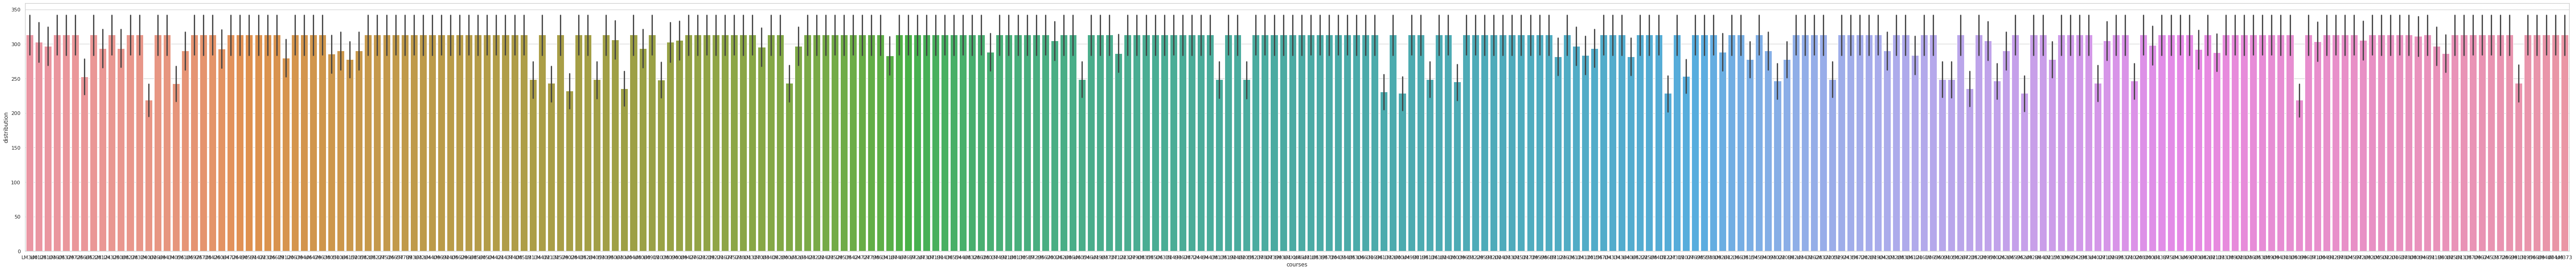

In [90]:
task_1_df = pd.DataFrame(CourseClasses)
task_1_df.head()
sns.set(style="whitegrid")
plt.figure(figsize=(100,10))
plt.xlabel('courses')
plt.ylabel('distribution')
ax = sns.barplot( data=task_1_df)

# Considering only 10 Courses for better visualization

In [91]:
courses = list(task_1_df.columns.values)
number_of_courses = 10
modified_df1 = task_1_df[ courses[0:number_of_courses] ]
modified_df1

,LM340,LM125,LM103,LM605,LM379,LM725,LM665,LM228,LM124,LM325
0,341,331,325,341,341,341,276,341,321,341
1,341,330,324,341,341,341,274,341,320,341
2,269,259,256,269,269,269,218,269,252,269
3,344,333,325,344,344,344,283,344,323,344
4,271,260,255,271,271,271,212,271,253,271


In [0]:
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
modified_df1.index = week

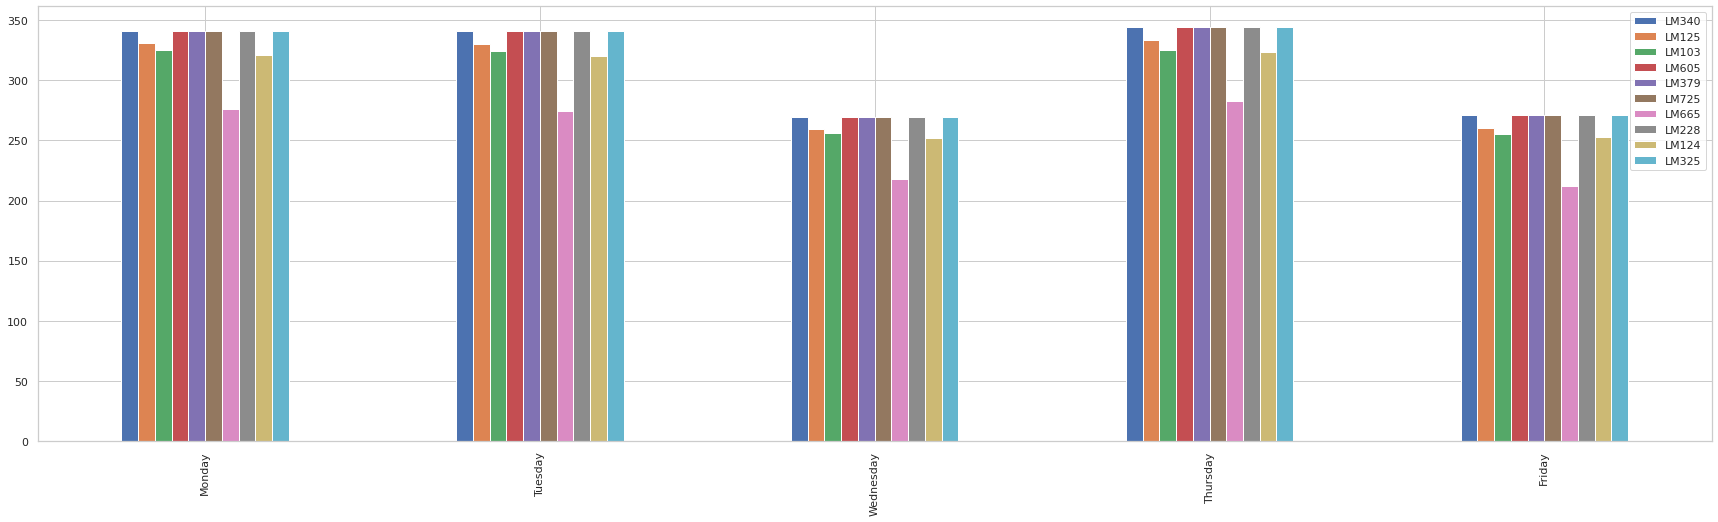

In [93]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rcParams.update({'font.size': 18})
modified_df1.plot.bar()

# Task 2
Find out the group hourly course distribution for Tuesday of the second week (week 2). Note
that the time interval is per hour, if for a given group there is a class module spread over
more than 1 hour (say 11:00 - 13:00), you will need to count the group in both of the two
time intervals(11:00 - 12:00, 12:00 - 13:00).


In [0]:
def hourlyDistribution(name):
  
    CourseAtues = tuesday_df[tuesday_df['course'] == name]
    
    modules = CourseAtues.loc[:, ['start_time', 'end_time','module']]
    # delete classes after 17:00
    modules = modules.drop(modules[modules['start_time'] > 17].index)
    # remove duplicate modules (same classes running)
    modules = modules.drop_duplicates(subset='module', keep='first')
    # sort by start time
    modules = modules.sort_values('start_time')
    # table = {0:[9,10], 1:[10:11], 2:}

    # loop to delete multi hour classes and replace them with 2 classes etc.
    for i in range(0,modules['start_time'].count()):
        if modules.iloc[i]['end_time'] - modules.iloc[i]['start_time'] > 1:

            # replace in the 2 new classes
            start = modules.iloc[i]['start_time']

            end = modules.iloc[i]['end_time']

            moduleName = modules.iloc[i]['module']

            # delete the original multihour
            modules = modules.drop(modules.index[i])
            df2 = pd.DataFrame([[start,end-1,moduleName]], columns=['start_time','end_time','module'])
            df3 = pd.DataFrame([[start+1,end,moduleName]], columns=['start_time','end_time','module'])
            modules = pd.concat([df2,df3,modules])

    modules = modules.sort_values('start_time')
    modules

    dist = []
    ls = [9,10,11,12,13,14,15,16,17]
    for i in range(len(ls)):
        emp = 0
        for j in range(0,modules['start_time'].count()):

            if modules.iloc[j]['start_time'] == ls[i]:
                emp += 1
        dist.append(emp)
    return dist


In [0]:
CourseArray = df['course'].unique()
#print(CourseArray)
# create dict with course and hourly distribution
Coursedistribution = {}
for i in range(len(CourseArray)):
    Coursedistribution[CourseArray[i]] = hourlyDistribution(CourseArray[i])
    
print(Coursedistribution)

{'LM340': [69, 65, 60, 56, 54, 47, 32, 27, 15], 'LM125': [66, 62, 54, 53, 54, 46, 32, 26, 15], 'LM103': [64, 62, 53, 52, 53, 46, 31, 25, 14], 'LM605': [69, 65, 60, 56, 54, 47, 32, 27, 15], 'LM379': [69, 65, 60, 56, 54, 47, 32, 27, 15], 'LM725': [69, 65, 58, 55, 55, 48, 32, 27, 15], 'LM665': [56, 50, 50, 47, 46, 42, 24, 21, 11], 'LM228': [69, 65, 58, 55, 55, 48, 32, 27, 15], 'LM124': [63, 60, 54, 53, 52, 45, 33, 25, 14], 'LM325': [69, 65, 60, 56, 54, 47, 32, 27, 15], 'LM088': [63, 60, 54, 53, 52, 45, 32, 25, 14], 'LM278': [69, 65, 60, 56, 54, 47, 32, 27, 15], 'LM374': [69, 65, 60, 56, 54, 47, 32, 27, 15], 'LM002': [52, 44, 45, 42, 38, 35, 23, 20, 8], 'LM669': [69, 65, 58, 55, 55, 48, 32, 27, 15], 'LM434': [69, 65, 59, 56, 55, 47, 31, 27, 15], 'LM056': [56, 48, 48, 47, 42, 38, 26, 20, 11], 'LM186': [63, 59, 53, 52, 51, 46, 32, 24, 13], 'LM975': [69, 65, 60, 56, 54, 47, 32, 27, 15], 'LM718': [69, 65, 59, 56, 55, 47, 31, 27, 15], 'LM426': [69, 65, 58, 55, 55, 47, 32, 28, 15], 'LM064': [63,

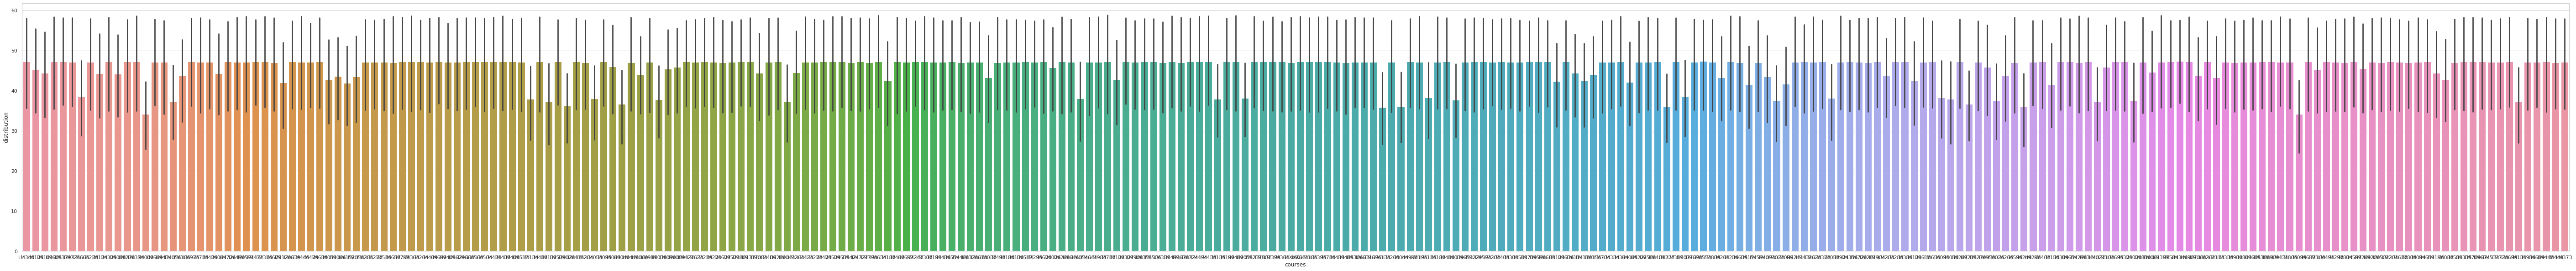

In [95]:
task_2_df = pd.DataFrame(Coursedistribution)
sns.set(style="whitegrid")
plt.figure(figsize=(100,10))
plt.xlabel('courses')
plt.ylabel('distribution')
ax = sns.barplot( data=task_2_df)

In [96]:
courses = list(task_2_df.columns.values)
number_of_courses = 10
modified_df2 = task_2_df[ courses[0:number_of_courses] ]
modified_df2

,LM340,LM125,LM103,LM605,LM379,LM725,LM665,LM228,LM124,LM325
0,69,66,64,69,69,69,56,69,63,69
1,65,62,62,65,65,65,50,65,60,65
2,60,54,53,60,60,58,50,58,54,60
3,56,53,52,56,56,55,47,55,53,56
4,54,54,53,54,54,55,46,55,52,54
5,47,46,46,47,47,48,42,48,45,47
6,32,32,31,32,32,32,24,32,33,32
7,27,26,25,27,27,27,21,27,25,27
8,15,15,14,15,15,15,11,15,14,15


In [0]:
time = ["9-10", "10-11", "11-12","12-13","13-14","14-15","15-16","16-17","17-18"]
modified_df2.index = time

Text(0, 0.5, 'Number of Modules per time period')

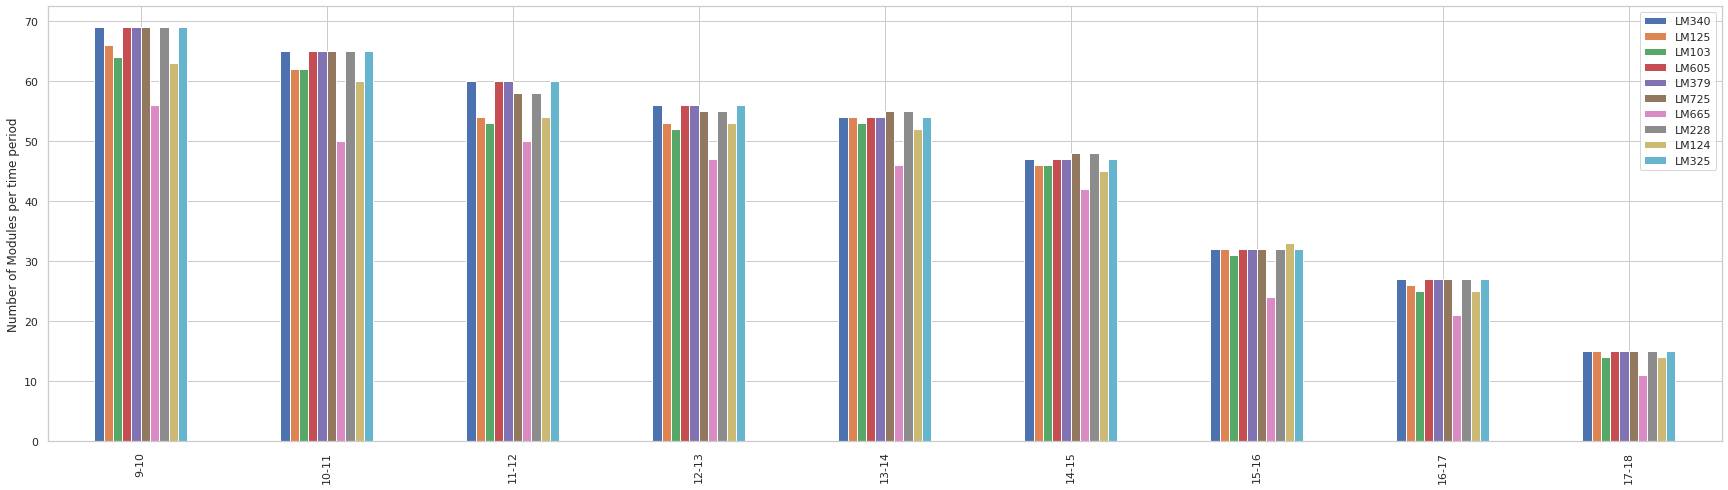

In [98]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rcParams.update({'font.size': 18})
modified_df2.plot.bar()
plt.ylabel("Number of Modules per time period")

# Task 3
for each of the intervals, you count a group of the students only if the class during it is the last class they are having for that day.

In [99]:
def lastClass(name):
    # Grab Week 2 Contents
    # CourseA = df[df['Course'].str.contains(name)]
    # CourseA = CourseA[(CourseA['week'] > 1) & (CourseA['week'] < 3) ]
    # CourseAtues = CourseA[CourseA['Day'].str.contains("Tuesday")]
    CourseAtues = tuesday_df[tuesday_df['course'] == name]
    
    modules = CourseAtues.loc[:, ['start_time', 'end_time','module']]
    # delete classes after 17:00
    modules = modules.drop(modules[modules['start_time'] > 17].index)
    # remove duplicate modules (same classes running)
    modules = modules.drop_duplicates(subset='module', keep='first')
    # sort by start time
    modules = modules.sort_values('start_time')
    # table = {0:[9,10], 1:[10:11], 2:}

    # loop to delete multi hour classes and replace them with 2 classes etc.
    for i in range(0,modules['start_time'].count()):
        if modules.iloc[i]['end_time'] - modules.iloc[i]['start_time'] > 1:

            # replace in the 2 new classes
            start = modules.iloc[i]['start_time']

            end = modules.iloc[i]['end_time']

            moduleName = modules.iloc[i]['module']

            # delete the original multihour
            modules = modules.drop(modules.index[i])
            df2 = pd.DataFrame([[start,end-1,moduleName]], columns=['start_time','end_time','module'])
            df3 = pd.DataFrame([[start+1,end,moduleName]], columns=['start_time','end_time','module'])
            modules = pd.concat([df2,df3,modules])

    modules = modules.sort_values('start_time')

    dist = []
    ls = [9,10,11,12,13,14,15,16,17]
    for i in range(len(ls)):
        emp = 0
        for j in range(0,modules['start_time'].count()):
            lastClass = modules.iloc[[-1]]
            time = int(lastClass.iloc[0]['start_time'])
            if time == ls[i]:
                emp += 1
            break
        dist.append(emp)
    return dist

print(lastClass("LM056"))

[0, 0, 0, 0, 0, 0, 0, 0, 1]


In [0]:
CourseArray = tuesday_df['course'].unique()
#print(CourseArray)
# create dict with course and hourly distribution

LastClassTuesday = [0,0,0,0,0,0,0,0,0]
for i in range(len(CourseArray)):
    LastClassTuesday = np.add(LastClassTuesday,lastClass(CourseArray[i]))
    
print(LastClassTuesday)

[  0   0   0   0   0   0   0   0 278]


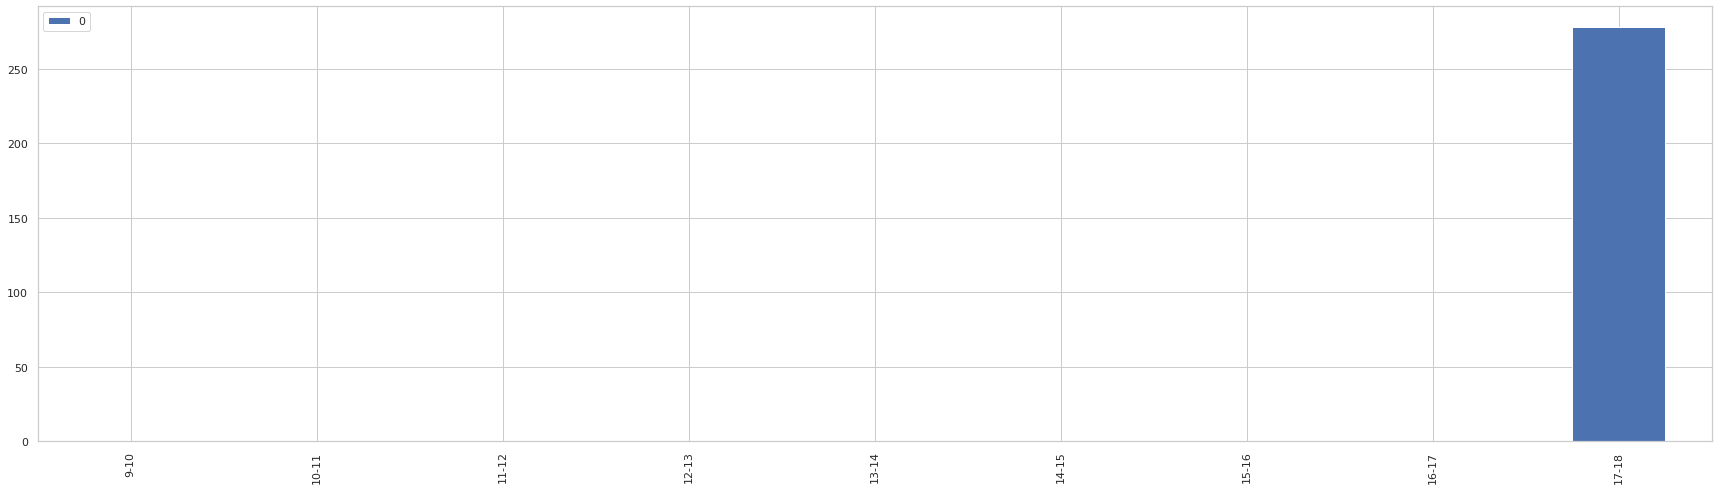

In [100]:
task_3_df = pd.DataFrame(LastClassTuesday)
task_3_df.index = time
task_3_df.plot.bar()